# Ejercicio de programación Regresión Lineal

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `IceCream.csv` contiene el dataset para el problema de regresion lineal. La primera columna es la temperatura del ambiente (en grados Celsius) y la segunda columna son los ingresos por ventas de helados (en pesos). Se busca predecir las ventas de helado basándose en la temperatura ambiente.

In [2]:
# Cargamos pandas para leer el archivo CSV
import pandas as pd

In [3]:
# Leer datos desde el archivo CSV local
# data = np.loadtxt('ex1data1.txt', delimiter=',')
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
df = pd.read_csv('/mnt/data/ex1data1 (1).csv')
data = df.values  # Convertir a numpy array
X, y = data[:, 0], data[:, 1]  # X = Population, y = Profit

m = y.size  # m = numero de ejemplos de entrenamiento


In [4]:
print(data)

[[  24.56688442  534.7990284 ]
 [  26.00519115  625.1901215 ]
 [  27.79055388  660.6322888 ]
 ...
 [  18.956898    770.85152   ]
 [  44.844966   1119.161576  ]
 [   8.522021    271.814507  ]]


In [5]:
print(X)

[24.56688442 26.00519115 27.79055388 ... 18.956898   44.844966
  8.522021  ]


In [6]:
print(y)

[ 534.7990284  625.1901215  660.6322888 ...  770.85152   1119.161576
  271.814507 ]


In [7]:
# Veamos las estadísticas de nuestros datos para entender la escala
print("=== ESTADÍSTICAS DE LOS DATOS ===")
print(f"Population (10k people) mínima: {X.min():.2f}")
print(f"Population (10k people) máxima: {X.max():.2f}")
print(f"Profit mínimo: {y.min():.2f} USD")
print(f"Profit máximo: {y.max():.2f} USD")
print(f"Profit promedio: {y.mean():.2f} USD")
print(f"Número total de registros: {len(y):,}")


=== ESTADÍSTICAS DE LOS DATOS ===
Temperatura mínima: -2.00°C
Temperatura máxima: 46.99°C
Ingreso mínimo: -476.90 USD
Ingreso máximo: 1512.77 USD
Ingreso promedio: 523.02 USD
Número total de registros: 10,000


In [8]:
print(X.size)

10000


### 1.1 Trazar los datos

In [9]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=1, mec='k')
    pyplot.ylabel('Ingreso por Ventas')
    pyplot.xlabel('Population (10k people) del ambiente')


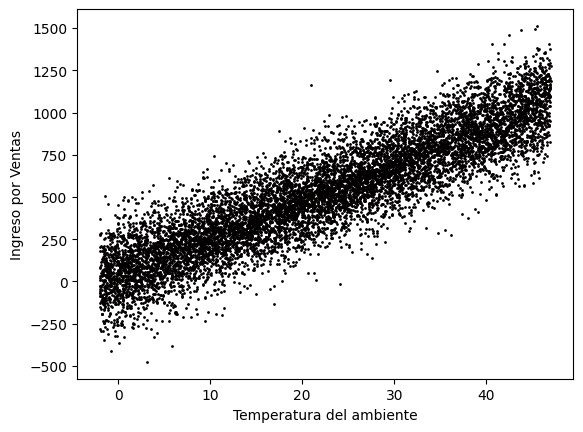

In [10]:
plotData(X, y)

In [11]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [12]:

X = np.stack([np.ones(m), X], axis=1)

In [13]:
print(X)

[[ 1.         24.56688442]
 [ 1.         26.00519115]
 [ 1.         27.79055388]
 ...
 [ 1.         18.956898  ]
 [ 1.         44.844966  ]
 [ 1.          8.522021  ]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [14]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion calcularCosto con dos valores diferentes de $\theta$.

In [15]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.5, 0.5]))
print('Con theta = [0.5, 0.5]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.6, 0.6]))
print('Con theta = [0.6, 0.6]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.7, 0.7]))
print('Con theta = [0.7, 0.7]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.8, 0.8]))
print('Con theta = [0.8, 0.8]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.9, 0.9]))
print('Con theta = [0.9, 0.9]\n Costo calculado = %.2f' % J)

#------------------------------------------------------------------------------

J = calcularCosto(X, y, theta=np.array([1.0, 1.0]))
print('Con theta = [0.9, 0.9]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([2.0, 2.0]))
print('Con theta = [0.9, 0.9]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([5.0, 5.0]))
print('Con theta = [0.9, 0.9]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([10.0, 10.0]))
print('Con theta = [0.9, 0.9]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([20.0, 20.0]))
print('Con theta = [0.9, 0.9]\n Costo calculado = %.2f' % J)



Con theta = [0, 0] 
 Costo calculado = 192136.67
Con theta = [0.5, 0.5]
 Costo calculado = 184081.63
Con theta = [0.6, 0.6]
 Costo calculado = 182492.57
Con theta = [0.7, 0.7]
 Costo calculado = 180910.84
Con theta = [0.8, 0.8]
 Costo calculado = 179336.42
Con theta = [0.9, 0.9]
 Costo calculado = 177769.32
Con theta = [0.9, 0.9]
 Costo calculado = 176209.55
Con theta = [0.9, 0.9]
 Costo calculado = 161014.27
Con theta = [0.9, 0.9]
 Costo calculado = 119819.54
Con theta = [0.9, 0.9]
 Costo calculado = 65798.61
Con theta = [0.9, 0.9]
 Costo calculado = 12645.35


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.


In [16]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.001.

In [17]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 10
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Estos valores representan la ecuación: Profit = {:.4f} + {:.4f} * Population (10k people)'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: 0.8637, 22.9479
Estos valores representan la ecuación: Ingresos = 0.8637 + 22.9479 * Temperatura
[np.float64(28702.73616649561), np.float64(12701.901909672886), np.float64(11135.238848754234), np.float64(10981.727325237973), np.float64(10966.567923819435), np.float64(10964.953709837535), np.float64(10964.665685699953), np.float64(10964.507572472794), np.float64(10964.362250586722), np.float64(10964.21825362118)]


In [18]:
# Veamos solo los valores finales de theta
print(f"Theta final: θ0 = {theta[0]:.4f}, θ1 = {theta[1]:.4f}")
print(f"Costo final: {J_history[-1]:.2f}")
print(f"Ecuación del modelo: Profit = {theta[0]:.2f} + {theta[1]:.2f} * Population (10k people)")

Theta final: θ0 = 0.8637, θ1 = 22.9479
Costo final: 10964.22
Ecuación del modelo: Ingresos = 0.86 + 22.95 * Temperatura


### 1.3 Validación con división 80%-20%

Ahora vamos a hacer una **validación más profesional** dividiendo los datos:
- **80% para entrenar** el modelo
- **20% para probar** qué tan bien funciona

In [19]:
# Dividir datos: 80% entrenamiento, 20% prueba
np.random.seed(42)  # Para resultados reproducibles
indices = np.random.permutation(len(y))  # Mezclar indices aleatoriamente

# Calcular punto de división (80% = 8000 registros)
split_point = int(0.8 * len(y))

# Dividir indices
train_indices = indices[:split_point]
test_indices = indices[split_point:]

# Crear conjuntos de entrenamiento y prueba
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

print(f"Datos de entrenamiento: {len(X_train):,} registros")
print(f"Datos de prueba: {len(X_test):,} registros")
print(f"Porcentaje entrenamiento: {len(X_train)/len(X)*100:.1f}%")
print(f"Porcentaje prueba: {len(X_test)/len(X)*100:.1f}%")

Datos de entrenamiento: 8,000 registros
Datos de prueba: 2,000 registros
Porcentaje entrenamiento: 80.0%
Porcentaje prueba: 20.0%


In [20]:
# Entrenar modelo SOLO con datos de entrenamiento (80%)
theta_train = np.zeros(2)
theta_train, J_history_train = gradientDescent(X_train, y_train, theta_train, alpha, iterations)

print("=== MODELO ENTRENADO CON 80% DE LOS DATOS ===")
print(f"θ0 = {theta_train[0]:.4f}, θ1 = {theta_train[1]:.4f}")
print(f"Ecuación: Profit = {theta_train[0]:.2f} + {theta_train[1]:.2f} * Population (10k people)")
print(f"Costo final (entrenamiento): {J_history_train[-1]:.2f}")

=== MODELO ENTRENADO CON 80% DE LOS DATOS ===
θ0 = 0.8672, θ1 = 22.9331
Ecuación: Ingresos = 0.87 + 22.93 * Temperatura
Costo final (entrenamiento): 10959.83


In [21]:
# Probar modelo con datos de prueba (20%)
predictions_test = np.dot(X_test, theta_train)
cost_test = calcularCosto(X_test, y_test, theta_train)

# Calcular errores
errors = predictions_test - y_test
mae = np.mean(np.abs(errors))  # Error absoluto medio
rmse = np.sqrt(np.mean(errors**2))  # Raíz del error cuadrático medio

print("=== PRUEBA CON 20% DE DATOS NUEVOS ===")
print(f"Costo en datos de prueba: {cost_test:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f} pesos")
print(f"Error cuadrático medio (RMSE): {rmse:.2f} pesos")
print("")
print("=== COMPARACIÓN ===")
print(f"Modelo completo (100%): θ0={theta[0]:.2f}, θ1={theta[1]:.2f}")
print(f"Modelo 80%: θ0={theta_train[0]:.2f}, θ1={theta_train[1]:.2f}")
print(f"Diferencia θ0: {abs(theta[0]-theta_train[0]):.3f}")
print(f"Diferencia θ1: {abs(theta[1]-theta_train[1]):.3f}")

if abs(theta[0]-theta_train[0]) < 1 and abs(theta[1]-theta_train[1]) < 1:
    print("¡Los modelos son muy similares! El modelo generaliza bien.")
else:
    print("Los modelos difieren. Podría haber sobreajuste.")

=== PRUEBA CON 20% DE DATOS NUEVOS ===
Costo en datos de prueba: 10981.91
Error absoluto medio (MAE): 116.11 pesos
Error cuadrático medio (RMSE): 148.20 pesos

=== COMPARACIÓN ===
Modelo completo (100%): θ0=0.86, θ1=22.95
Modelo 80%: θ0=0.87, θ1=22.93
Diferencia θ0: 0.003
Diferencia θ1: 0.015
¡Los modelos son muy similares! El modelo generaliza bien.


Se utilizan los parametros finales para graficar la linea de regresión.

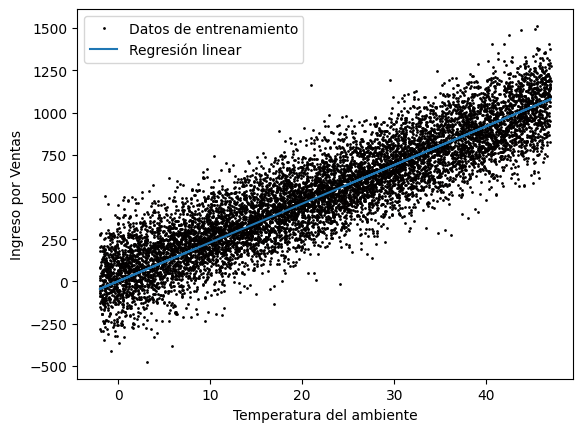

In [22]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones de ingresos por ventas de helado.

In [23]:
# Predecir Profit para poblaciones de 6 y 8 (en decenas de miles de personas)
predict1 = np.dot([1, 6], theta)
print('Para una población de 6 (x10k), se predice un profit de {:.2f} USD\n'.format(predict1))

predict2 = np.dot([1, 8], theta)
print('Para una población de 8 (x10k), se predice un profit de {:.2f} USD\n'.format(predict2))


Para una temperatura de 25°C, se predice un ingreso de 574.56 USD

Para una temperatura de 30°C, se predice un ingreso de 689.30 USD



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimensiones con los valores de $\theta_0$ y $\theta_1$.

**¿Qué muestran estas gráficas?**
- **Superficie 3D**: Muestra cómo varía el costo según diferentes valores de θ0 y θ1
- **Contorno**: Es como un "mapa topográfico" del costo - cada línea representa el mismo nivel de costo
- **Punto rojo**: Muestra dónde terminó nuestro algoritmo (los valores óptimos de θ)
- **Convergencia**: Muestra cómo el costo fue bajando durante las iteraciones

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

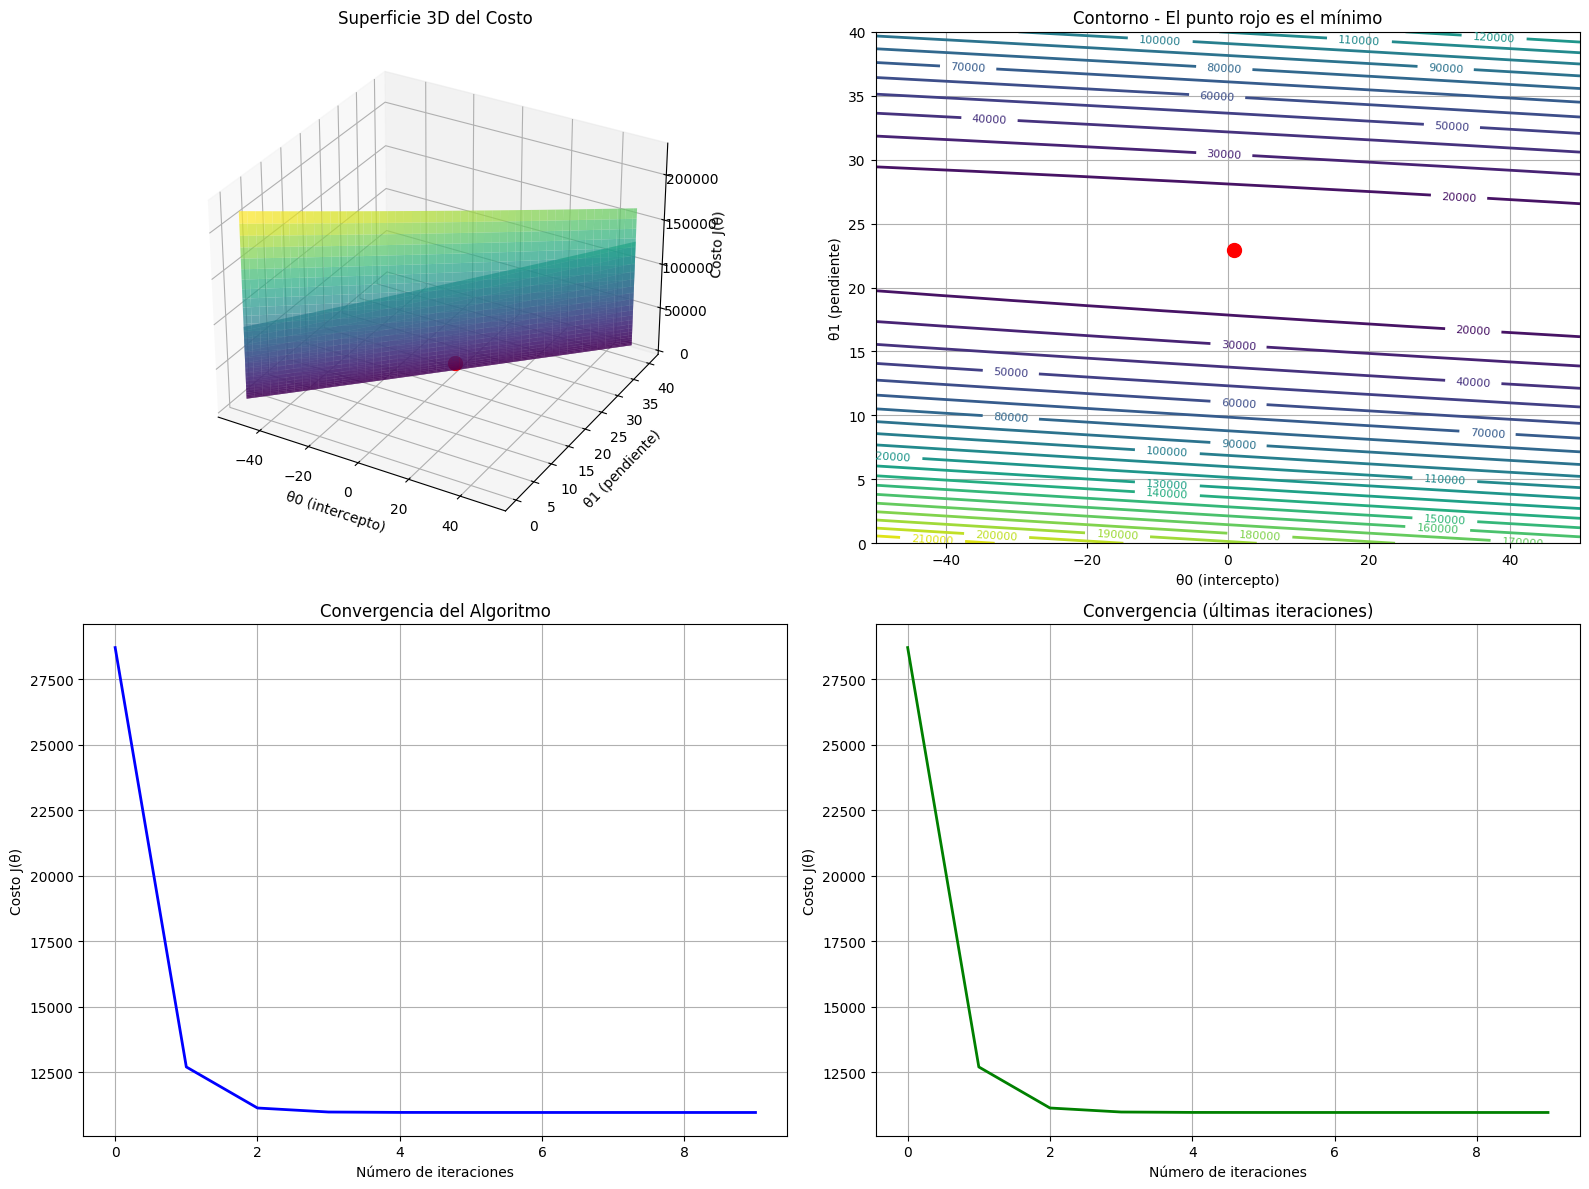

In [24]:
# cuadrícula sobre la que se calcula J - ajustada para nuestro dataset de tiendas
theta0_vals = np.linspace(-50, 50, 100)    # Rango más amplio centrado en θ0 ≈ 6.35
theta1_vals = np.linspace(0, 40, 100)      # Rango más amplio centrado en θ1 ≈ 22.77

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(16, 12))

# Superficie 3D
ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis', alpha=0.7)
ax.scatter([theta[0]], [theta[1]], [calcularCosto(X, y, theta)], color='red', s=100)
pyplot.xlabel('θ0 (intercepto)')
pyplot.ylabel('θ1 (pendiente)')
ax.set_zlabel('Costo J(θ)')
pyplot.title('Superficie 3D del Costo')

# graficar contornos
ax = pyplot.subplot(222)
contour = pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=20)
pyplot.clabel(contour, inline=True, fontsize=8)
pyplot.xlabel('θ0 (intercepto)')
pyplot.ylabel('θ1 (pendiente)')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno - El punto rojo es el mínimo')
pyplot.grid(True)

# Grafica la convergencia del costo
ax = pyplot.subplot(223)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2, color='blue')
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J(θ)')
pyplot.title('Convergencia del Algoritmo')
pyplot.grid(True)

# Zoom a las últimas iteraciones para ver mejor la convergencia
ax = pyplot.subplot(224)
last_100 = J_history[-100:] if len(J_history) > 100 else J_history
pyplot.plot(np.arange(len(J_history)-len(last_100), len(J_history)), last_100, lw=2, color='green')
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J(θ)')
pyplot.title('Convergencia (últimas iteraciones)')
pyplot.grid(True)

pyplot.tight_layout()
pass

### 1.5 Validación con división 80%-20%

Ahora vamos a hacer una **validación más profesional** dividiendo los datos:
- **80% para entrenar** el modelo
- **20% para probar** qué tan bien funciona con datos nuevos

In [25]:
# Dividir datos: 80% entrenamiento, 20% prueba
np.random.seed(42)  # Para resultados reproducibles
indices = np.random.permutation(len(y))  # Mezclar indices aleatoriamente

# Calcular punto de división (80% = 8000 registros)
split_point = int(0.8 * len(y))

# Dividir indices
train_indices = indices[:split_point]
test_indices = indices[split_point:]

# Crear conjuntos de entrenamiento y prueba
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

print(f"Datos de entrenamiento: {len(X_train):,} registros")
print(f"Datos de prueba: {len(X_test):,} registros")
print(f"Porcentaje entrenamiento: {len(X_train)/len(X)*100:.1f}%")
print(f"Porcentaje prueba: {len(X_test)/len(X)*100:.1f}%")

Datos de entrenamiento: 8,000 registros
Datos de prueba: 2,000 registros
Porcentaje entrenamiento: 80.0%
Porcentaje prueba: 20.0%


In [26]:
# Entrenar modelo SOLO con datos de entrenamiento (80%)
theta_train = np.zeros(2)
theta_train, J_history_train = gradientDescent(X_train, y_train, theta_train, alpha, iterations)

print("=== MODELO ENTRENADO CON 80% DE LOS DATOS ===")
print(f"θ0 = {theta_train[0]:.4f}, θ1 = {theta_train[1]:.4f}")
print(f"Ecuación: Profit = {theta_train[0]:.2f} + {theta_train[1]:.2f} * Population (10k people)")
print(f"Costo final (entrenamiento): {J_history_train[-1]:.2f}")

=== MODELO ENTRENADO CON 80% DE LOS DATOS ===
θ0 = 0.8672, θ1 = 22.9331
Ecuación: Ingresos = 0.87 + 22.93 * Temperatura
Costo final (entrenamiento): 10959.83


In [27]:
# Probar modelo con datos de prueba (20%)
predictions_test = np.dot(X_test, theta_train)
cost_test = calcularCosto(X_test, y_test, theta_train)

# Calcular errores
errors = predictions_test - y_test
mae = np.mean(np.abs(errors))  # Error absoluto medio
rmse = np.sqrt(np.mean(errors**2))  # Raíz del error cuadrático medio

print("=== PRUEBA CON 20% DE DATOS NUEVOS ===")
print(f"Costo en datos de prueba: {cost_test:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f} pesos")
print(f"Error cuadrático medio (RMSE): {rmse:.2f} pesos")
print("")
print("=== COMPARACIÓN ===")
print(f"Modelo completo (100%): θ0={theta[0]:.2f}, θ1={theta[1]:.2f}")
print(f"Modelo 80%: θ0={theta_train[0]:.2f}, θ1={theta_train[1]:.2f}")
print(f"Diferencia θ0: {abs(theta[0]-theta_train[0]):.3f}")
print(f"Diferencia θ1: {abs(theta[1]-theta_train[1]):.3f}")

if abs(theta[0]-theta_train[0]) < 1 and abs(theta[1]-theta_train[1]) < 1:
    print("¡Los modelos son muy similares! El modelo generaliza bien.")
else:
    print("Los modelos difieren. Podría haber sobreajuste.")

=== PRUEBA CON 20% DE DATOS NUEVOS ===
Costo en datos de prueba: 10981.91
Error absoluto medio (MAE): 116.11 pesos
Error cuadrático medio (RMSE): 148.20 pesos

=== COMPARACIÓN ===
Modelo completo (100%): θ0=0.86, θ1=22.95
Modelo 80%: θ0=0.87, θ1=22.93
Diferencia θ0: 0.003
Diferencia θ1: 0.015
¡Los modelos son muy similares! El modelo generaliza bien.


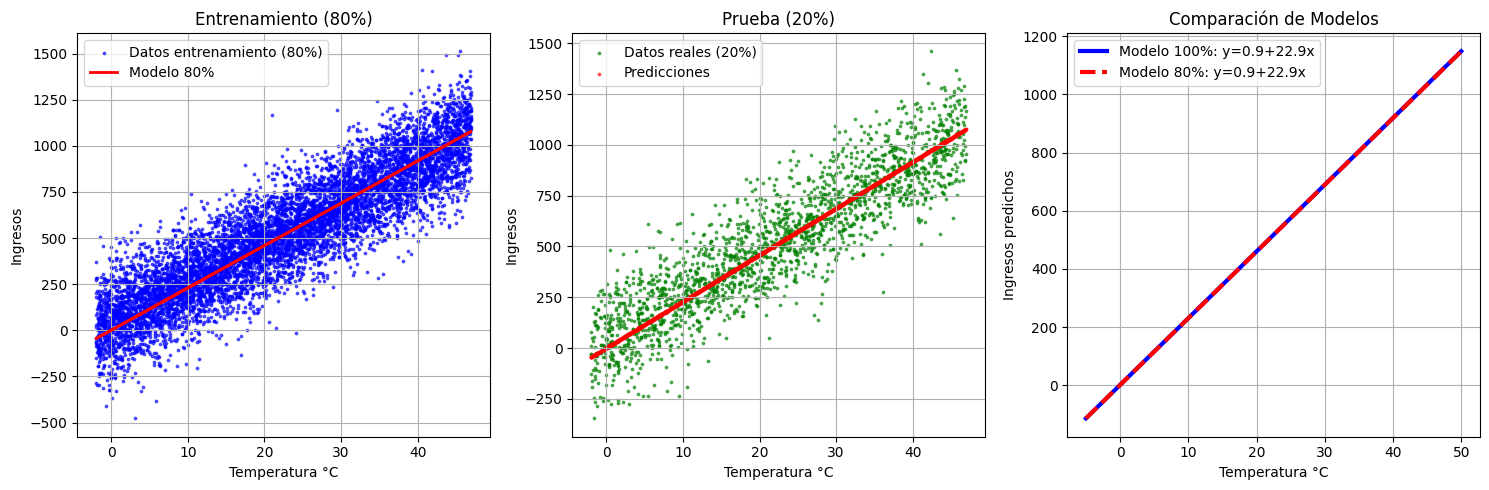

In [28]:
# Visualización comparativa de ambos modelos
fig = pyplot.figure(figsize=(15, 5))

# Gráfica 1: Datos de entrenamiento con modelo 80%
ax1 = pyplot.subplot(131)
pyplot.scatter(X_train[:, 1], y_train, c='blue', s=3, alpha=0.6, label='Datos entrenamiento (80%)')
pyplot.plot(X_train[:, 1], np.dot(X_train, theta_train), 'r-', linewidth=2, label='Modelo 80%')
pyplot.xlabel('Population (10k people)')
pyplot.ylabel('Profit')
pyplot.title('Entrenamiento (80%)')
pyplot.legend()
pyplot.grid(True)

# Gráfica 2: Datos de prueba con predicciones
ax2 = pyplot.subplot(132)
pyplot.scatter(X_test[:, 1], y_test, c='green', s=3, alpha=0.6, label='Datos reales (20%)')
pyplot.scatter(X_test[:, 1], predictions_test, c='red', s=3, alpha=0.6, label='Predicciones')
pyplot.xlabel('Population (10k people)')
pyplot.ylabel('Profit')
pyplot.title('Prueba (20%)')
pyplot.legend()
pyplot.grid(True)

# Gráfica 3: Comparación de modelos
ax3 = pyplot.subplot(133)
temps = np.linspace(-5, 50, 100)
X_temps = np.column_stack([np.ones(100), temps])
pred_100 = np.dot(X_temps, theta)
pred_80 = np.dot(X_temps, theta_train)

pyplot.plot(temps, pred_100, 'b-', linewidth=3, label=f'Modelo 100%: y={theta[0]:.1f}+{theta[1]:.1f}x')
pyplot.plot(temps, pred_80, 'r--', linewidth=3, label=f'Modelo 80%: y={theta_train[0]:.1f}+{theta_train[1]:.1f}x')
pyplot.xlabel('Population (10k people)')
pyplot.ylabel('Predicted Profit')
pyplot.title('Comparación de Modelos')
pyplot.legend()
pyplot.grid(True)

pyplot.tight_layout()
pyplot.show()